<a href="https://colab.research.google.com/github/BendelHybrid/BANK-RATES-RETIREMENT/blob/main/Flood_prediction_in_Lagos_by_ReginaAgaren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Load the Dataset and Examine its Structure

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from datetime import timedelta

# Load the dataset
file_path = '/content/Lagos_weather_data_final.xlsx'
lwd = pd.read_excel(file_path)

# Display the first few rows and the column information
lwd.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,Lagos,2004-05-13,31.7,28.2,30.0,38.9,32.6,35.8,24.9,74.7,...,NaN,2004-05-13T06:30:34,2004-05-13T18:55:02,0.80,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,Lagos,2004-05-14,26.6,25.7,26.3,26.6,25.7,26.3,25.9,97.5,...,NaN,2004-05-14T06:30:27,2004-05-14T18:55:10,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,Lagos,2004-05-15,25.1,25.1,25.1,25.1,25.1,25.1,25.1,100.0,...,NaN,2004-05-15T06:30:20,2004-05-15T18:55:18,0.87,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
3,Lagos,2004-05-16,22.9,22.9,22.9,22.9,22.9,22.9,22.2,95.8,...,NaN,2004-05-16T06:30:14,2004-05-16T18:55:27,0.90,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,Lagos,2004-05-17,31.4,25.1,28.6,38.7,25.1,33.6,25.5,84.2,...,NaN,2004-05-17T06:30:08,2004-05-17T18:55:36,0.94,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


In [ ]:
lwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              7357 non-null   object        
 1   datetime          7357 non-null   datetime64[ns]
 2   tempmax           7021 non-null   float64       
 3   tempmin           7021 non-null   float64       
 4   temp              7021 non-null   float64       
 5   feelslikemax      7021 non-null   float64       
 6   feelslikemin      7021 non-null   float64       
 7   feelslike         7021 non-null   float64       
 8   dew               7021 non-null   float64       
 9   humidity          7021 non-null   float64       
 10  precip            7021 non-null   float64       
 11  precipprob        7021 non-null   float64       
 12  precipcover       7357 non-null   float64       
 13  preciptype        3340 non-null   object        
 14  flood occurrence  3481 n

In [ ]:
lwd.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'flood occurrence', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

In [ ]:
lwd.columns = ['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'flood occurrence', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin']

In [ ]:
lwd.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'flood occurrence', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

# **Cleaning the data/Fill Missing Values**

In [ ]:
weather_df = lwd.filter(['datetime','precip','precipprob',  'precipcover', 'preciptype','windgust', 'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp','dew', 'humidity', 'sealevelpressure', 'moonphase', 'flood_occurence'] , axis=1)
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,2004-05-13,0.0,0.0,0.0,NaN,NaN,20.5,128.2,31.7,28.2,30.0,24.9,74.7,NaN,0.80
1,2004-05-14,0.0,0.0,0.0,NaN,NaN,20.5,280.4,26.6,25.7,26.3,25.9,97.5,NaN,0.83
2,2004-05-15,0.0,0.0,0.0,NaN,NaN,16.6,180.0,25.1,25.1,25.1,25.1,100.0,NaN,0.87
3,2004-05-16,0.0,0.0,0.0,NaN,NaN,11.2,350.0,22.9,22.9,22.9,22.2,95.8,NaN,0.90
4,2004-05-17,0.0,0.0,0.0,NaN,NaN,31.3,242.3,31.4,25.1,28.6,25.5,84.2,NaN,0.94


In [ ]:
weather_df.preciptype.fillna('no_rain', inplace=True)
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,2004-05-13,0.0,0.0,0.0,no_rain,NaN,20.5,128.2,31.7,28.2,30.0,24.9,74.7,NaN,0.80
1,2004-05-14,0.0,0.0,0.0,no_rain,NaN,20.5,280.4,26.6,25.7,26.3,25.9,97.5,NaN,0.83
2,2004-05-15,0.0,0.0,0.0,no_rain,NaN,16.6,180.0,25.1,25.1,25.1,25.1,100.0,NaN,0.87
3,2004-05-16,0.0,0.0,0.0,no_rain,NaN,11.2,350.0,22.9,22.9,22.9,22.2,95.8,NaN,0.90
4,2004-05-17,0.0,0.0,0.0,no_rain,NaN,31.3,242.3,31.4,25.1,28.6,25.5,84.2,NaN,0.94


In [ ]:
median = weather_df.windgust.median()

In [ ]:
 weather_df.windgust.fillna(median, inplace=True)

In [ ]:
median = weather_df.sealevelpressure.median()
median

1011.9

In [ ]:
weather_df.sealevelpressure.fillna(median, inplace=True)

In [ ]:
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,2004-05-13,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80
1,2004-05-14,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83
2,2004-05-15,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87
3,2004-05-16,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90
4,2004-05-17,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94


In [ ]:
flood_occurence = lwd['flood occurrence']
flood_occurence.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: flood occurrence, dtype: float64

In [ ]:
flood_occurence.fillna(0, inplace=True)

In [ ]:
weather_df.isna().sum()

datetime              0
precip              336
precipprob          336
precipcover           0
preciptype            0
windgust              0
windspeed           366
winddir             714
tempmax             336
tempmin             336
temp                336
dew                 336
humidity            336
sealevelpressure      0
moonphase           366
dtype: int64

In [ ]:
weather_df.dropna(inplace=True)

In [ ]:
weather_df['flood_occurence'] = flood_occurence

In [ ]:
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence
0,2004-05-13,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,0.0
1,2004-05-14,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,0.0
2,2004-05-15,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,0.0
3,2004-05-16,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,0.0
4,2004-05-17,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,0.0


In [ ]:
datetime = pd.to_datetime(weather_df['datetime'])

# **Feature Engineering**

In [ ]:
weather_df['year'] = datetime.dt.year
weather_df['month'] = datetime.dt.month
weather_df['day'] = datetime.dt.day
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence,year,month,day
0,2004-05-13,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,0.0,2004,5,13
1,2004-05-14,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,0.0,2004,5,14
2,2004-05-15,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,0.0,2004,5,15
3,2004-05-16,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,0.0,2004,5,16
4,2004-05-17,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,0.0,2004,5,17


In [ ]:
weather_df.drop(['datetime'], axis=1, inplace=True)

In [ ]:
weather_df.head()

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence,year,month,day
0,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,0.0,2004,5,13
1,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,0.0,2004,5,14
2,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,0.0,2004,5,15
3,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,0.0,2004,5,16
4,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,0.0,2004,5,17


# **Correlation**

In [ ]:
corr = weather_df.corr(numeric_only=True)

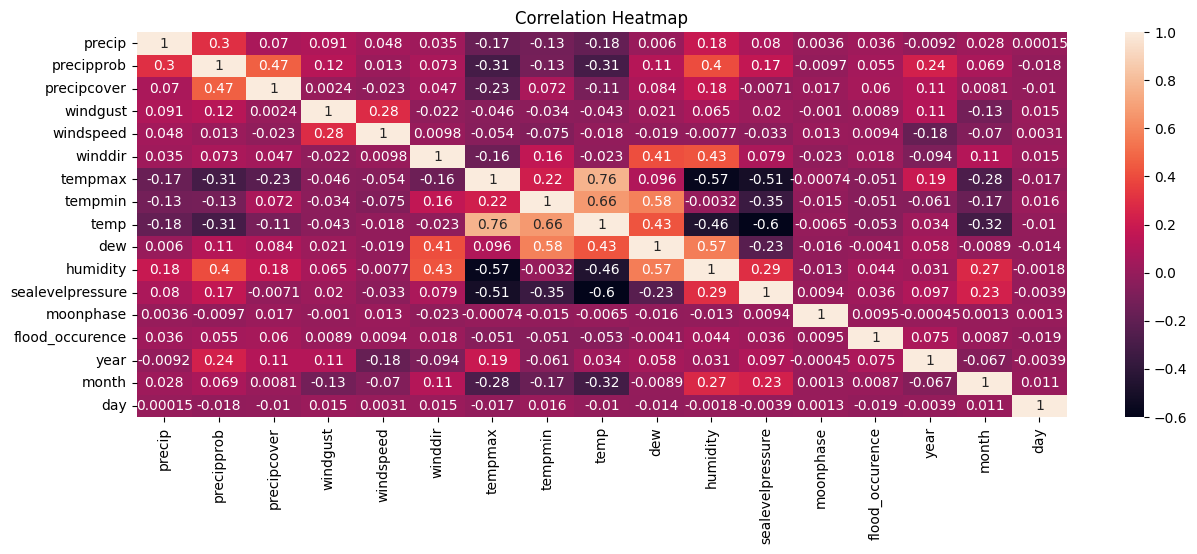

In [ ]:
!pip install seaborn
import seaborn as sns
plt.figure(figsize=(15,5))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
weather_df.flood_occurence.replace(0, 'no_flood', inplace=True)
weather_df.flood_occurence.replace(1, 'flood', inplace=True)

# **EDA**

In [ ]:
flood_df = weather_df[weather_df['flood_occurence'] == 'flood']
flood_df

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence,year,month,day
92,0.0,0.0,0.00,no_rain,28.1,33.5,232.3,27.1,22.6,25.4,22.3,83.6,1014.9,0.92,flood,2004,8,13
394,145.0,100.0,8.33,rain,28.1,18.4,279.5,28.1,22.1,23.8,22.9,95.1,1012.3,0.15,flood,2005,6,11
395,34.0,100.0,4.17,rain,28.1,22.3,340.0,24.9,22.7,23.6,23.2,98.1,1011.9,0.18,flood,2005,6,12
451,0.0,0.0,0.00,no_rain,28.1,29.5,247.3,26.1,24.1,25.1,22.1,83.5,1014.3,0.08,flood,2005,8,7
2230,17.1,100.0,100.00,rain,28.1,18.7,224.1,27.6,27.1,27.3,24.7,85.9,1011.9,0.32,flood,2010,6,21
2614,1.0,100.0,4.17,rain,25.9,29.5,229.9,26.0,22.0,24.2,23.3,95.0,1014.2,0.33,flood,2011,7,10
3350,0.1,100.0,4.17,rain,24.1,14.8,230.2,28.1,24.0,25.6,24.1,91.6,1015.0,0.25,flood,2013,7,15
4804,18.1,100.0,8.33,rain,25.9,14.8,247.9,25.1,24.0,24.6,23.8,95.5,1015.2,0.48,flood,2017,7,8
5068,3.5,100.0,25.00,rain,30.6,18.4,206.6,35.0,26.6,28.4,25.2,83.6,1009.8,0.43,flood,2018,3,29
5356,0.0,0.0,0.00,no_rain,27.0,20.5,186.4,35.0,25.0,28.9,25.0,81.1,1011.0,0.18,flood,2019,1,11


# **show the trend of flood occurence by year**

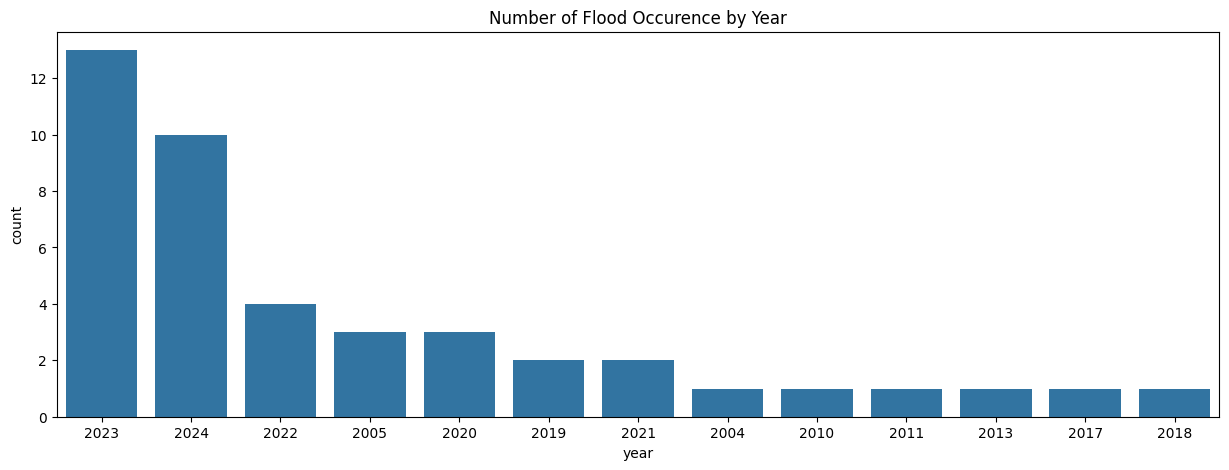

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Number of Flood Occurence by Year')
sns.countplot(x='year', data=flood_df, order=flood_df['year'].value_counts().index)
plt.show()

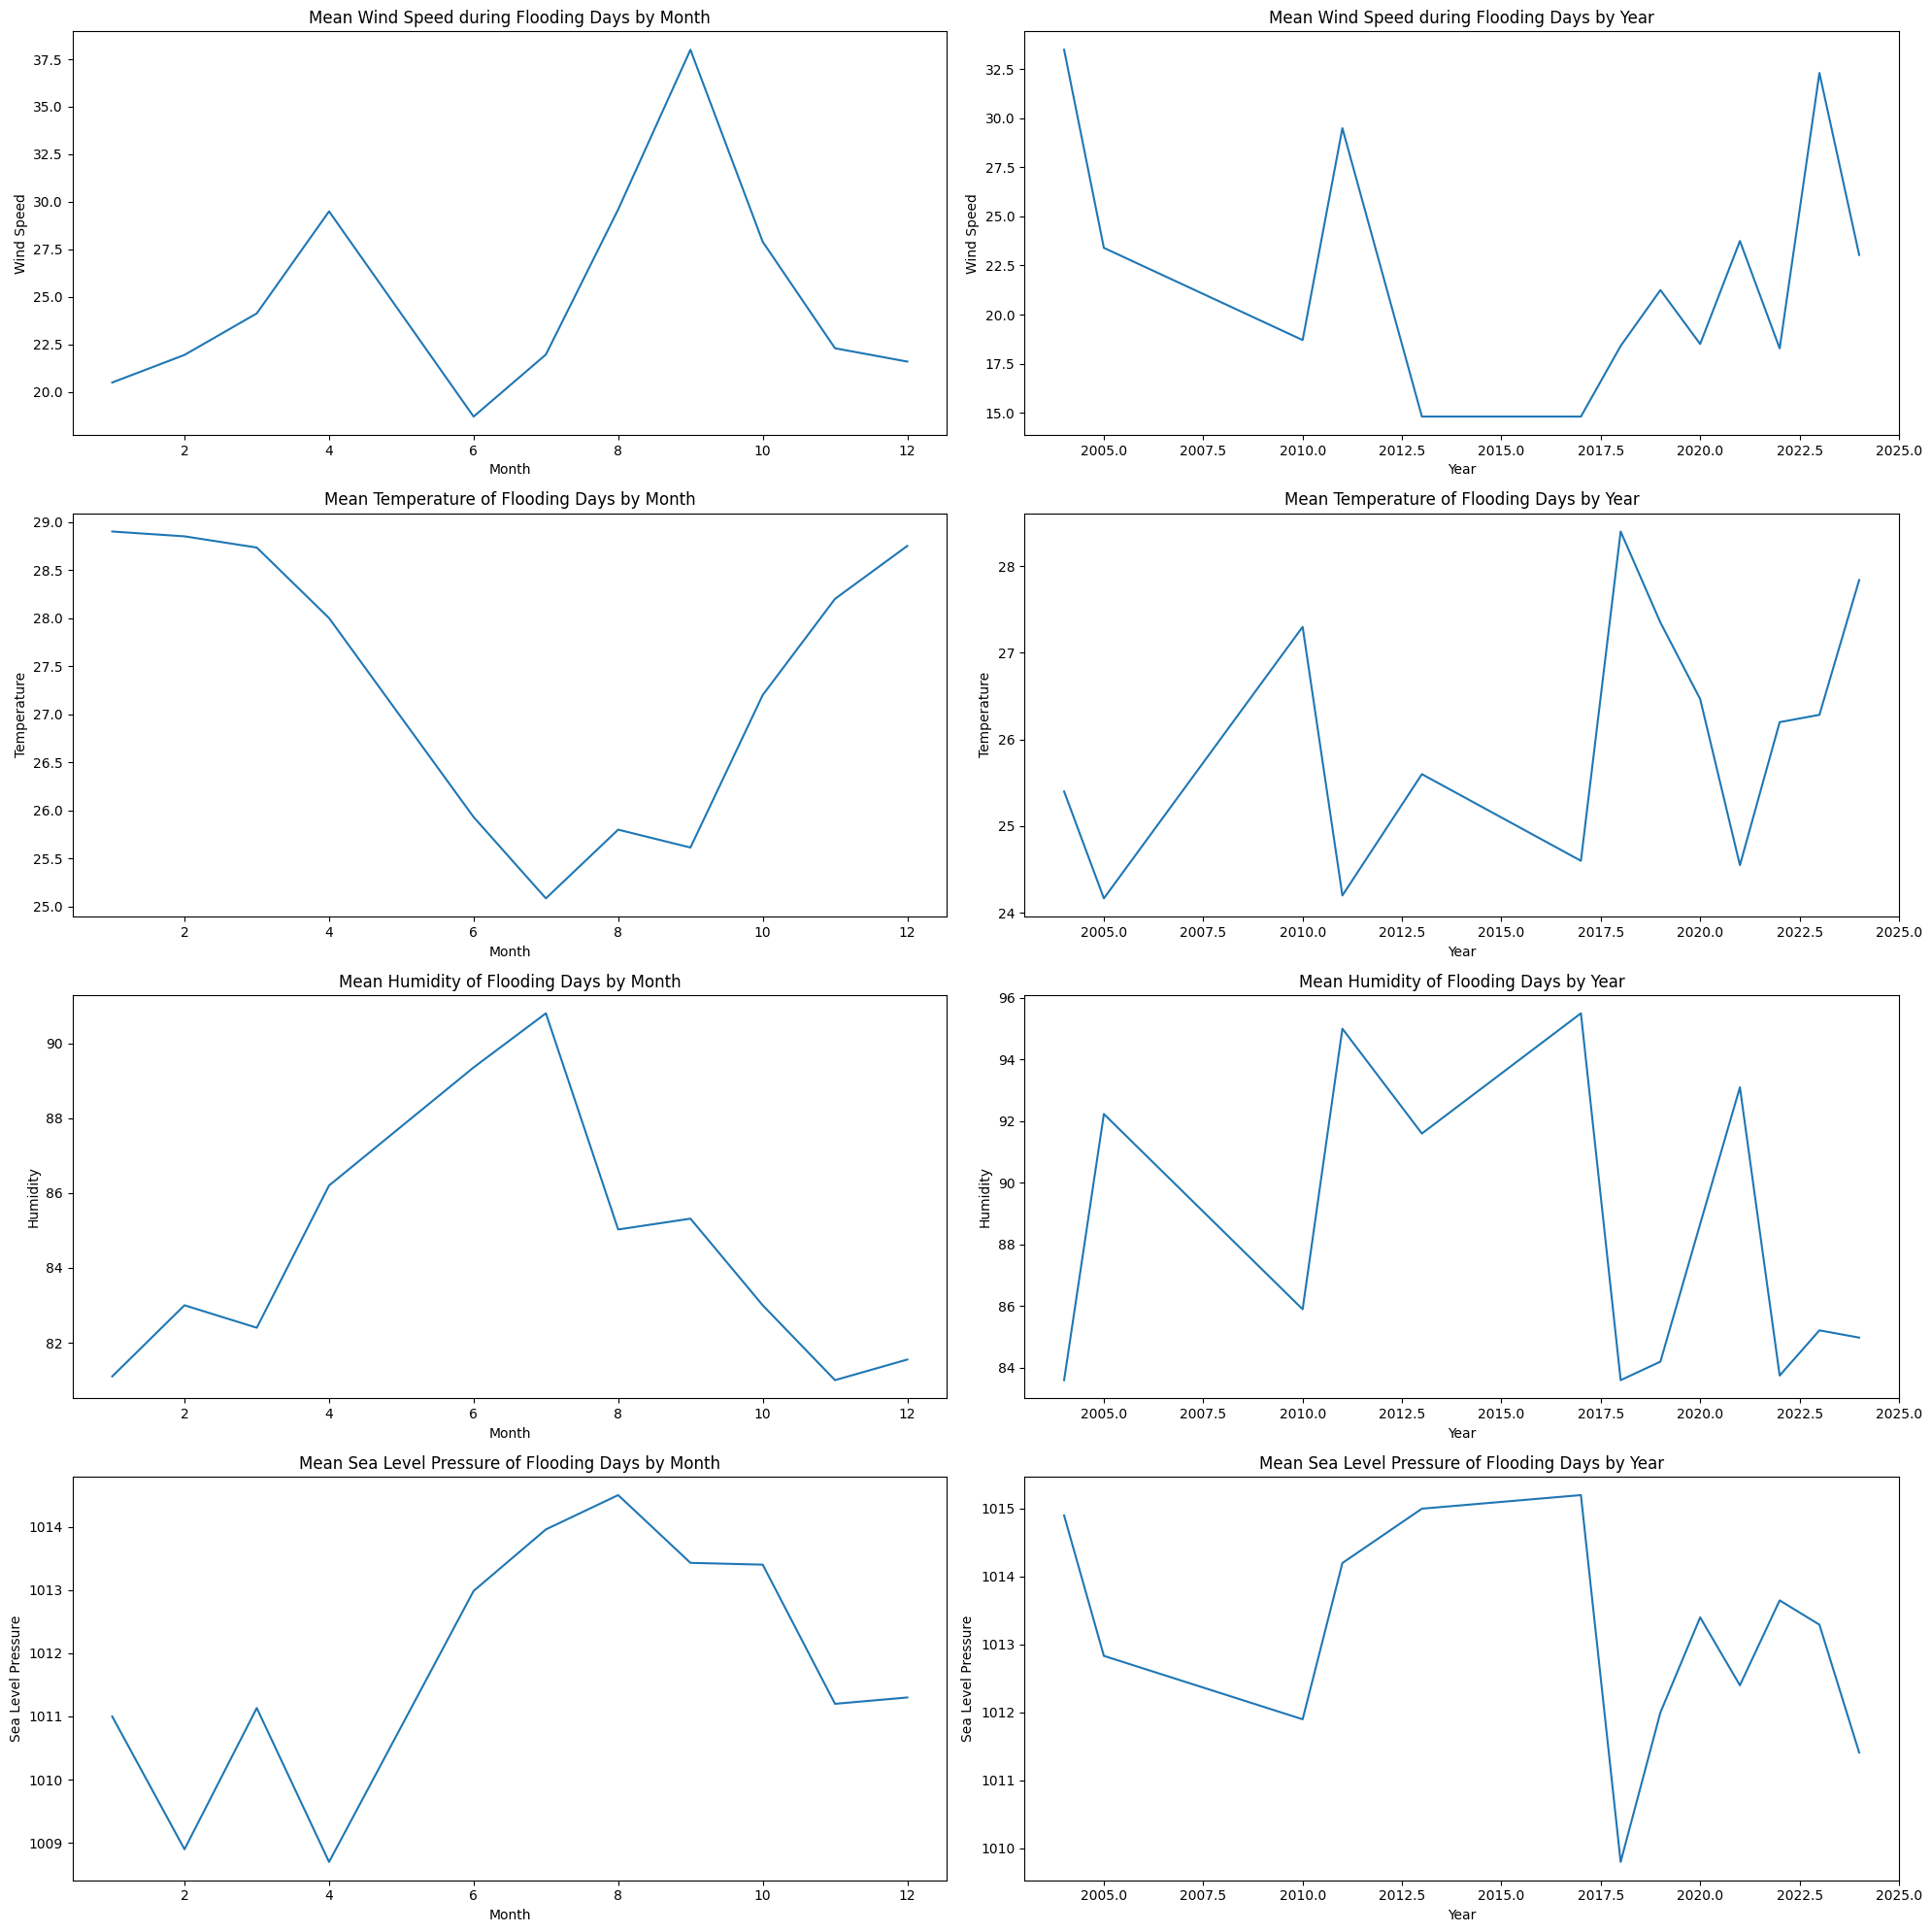

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to save plots
def save_plot(fig, filename):
    fig.savefig(filename, bbox_inches='tight')

# Create a figure and a grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows and 2 columns

# Plot Mean Wind Speed during Flooding Days by Month
x = flood_df.groupby("month")["windspeed"].mean()
sns.lineplot(x=x.index, y=x.values, ax=axs[0, 0])
axs[0, 0].set_title('Mean Wind Speed during Flooding Days by Month')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Wind Speed')

# Plot Mean Wind Speed during Flooding Days by Year
x = flood_df.groupby("year")["windspeed"].mean()
sns.lineplot(x=x.index, y=x.values, ax=axs[0, 1])
axs[0, 1].set_title('Mean Wind Speed during Flooding Days by Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Wind Speed')

# Plot Mean Temperature of Flooding Days by Month
x = flood_df.groupby("month")["temp"].mean()
sns.lineplot(x=x.index, y=x.values, ax=axs[1, 0])
axs[1, 0].set_title('Mean Temperature of Flooding Days by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Temperature')

# Plot Mean Temperature of Flooding Days by Year
x = flood_df.groupby("year")["temp"].mean()
sns.lineplot(x=x.index, y=x.values, ax=axs[1, 1])
axs[1, 1].set_title('Mean Temperature of Flooding Days by Year')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Temperature')

# Plot Mean Humidity of Flooding Days by Month
x = flood_df.groupby("month")["humidity"].mean()
sns.lineplot(x=x.index, y=x.values, ax=axs[2, 0])
axs[2, 0].set_title('Mean Humidity of Flooding Days by Month')
axs[2, 0].set_xlabel('Month')
axs[2, 0].set_ylabel('Humidity')

# Plot Mean Humidity of Flooding Days by Year
x = flood_df.groupby("year")["humidity"].mean()
sns.lineplot(x=x.index, y=x.values, ax=axs[2, 1])
axs[2, 1].set_title('Mean Humidity of Flooding Days by Year')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Humidity')

# Plot Mean Sea Level Pressure of Flooding Days by Month
x = flood_df.groupby("month")["sealevelpressure"].mean()
sns.lineplot(x=x.index, y=x.values, ax=axs[3, 0])
axs[3, 0].set_title('Mean Sea Level Pressure of Flooding Days by Month')
axs[3, 0].set_xlabel('Month')
axs[3, 0].set_ylabel('Sea Level Pressure')

# Plot Mean Sea Level Pressure of Flooding Days by Year
x = flood_df.groupby("year")["sealevelpressure"].mean()
sns.lineplot(x=x.index, y=x.values, ax=axs[3, 1])
axs[3, 1].set_title('Mean Sea Level Pressure of Flooding Days by Year')
axs[3, 1].set_xlabel('Year')
axs[3, 1].set_ylabel('Sea Level Pressure')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined figure
save_plot(fig, 'combined_visuals.png')

# Show the plots
plt.show()




# **Categorical Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
weather_df['preciptype'] = encoder.fit_transform(weather_df['preciptype'])
weather_df.head()

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence,year,month,day
0,0.0,0.0,0.0,0,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,no_flood,2004,5,13
1,0.0,0.0,0.0,0,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,no_flood,2004,5,14
2,0.0,0.0,0.0,0,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,no_flood,2004,5,15
3,0.0,0.0,0.0,0,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,no_flood,2004,5,16
4,0.0,0.0,0.0,0,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,no_flood,2004,5,17


# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'precip',	'precipprob',	'precipcover']
weather_df[cols_to_scale] = scaler.fit_transform(weather_df[cols_to_scale])

# **Building and Training a Prediction Model**

In [ ]:
x_train = weather_df.drop(['flood_occurence', 'year', 'day', 'month'], axis=1)
y_train = weather_df['flood_occurence']

In [ ]:
#Resampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
Counter(y_train)

Counter({'no_flood': 6600, 'flood': 43})

In [ ]:
undersampler = RandomUnderSampler()

In [ ]:
x_train_res, y_train_res = undersampler.fit_resample(x_train, y_train)

In [ ]:
x_train_res

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,-0.276042,-0.907467,-0.422498,0,-0.124897,0.867535,0.275960,-1.626762,-0.978817,-1.299822,-0.864101,0.133193,1.622162,0.92
1,7.528545,1.101968,0.179745,1,-0.124897,-0.444550,1.259647,-1.237168,-1.241901,-2.312818,-0.556765,1.715822,0.165852,0.15
2,1.553999,1.101968,-0.121015,1,-0.124897,-0.105667,2.520517,-2.483867,-0.926200,-2.439442,-0.403097,2.128682,-0.058196,0.18
3,-0.276042,-0.907467,-0.422498,0,-0.124897,0.519962,0.588572,-2.016355,-0.189565,-1.489758,-0.966547,0.119431,1.286090,0.08
4,0.644361,1.101968,6.807303,1,-0.124897,-0.418482,0.105065,-1.431965,1.388940,-0.096889,0.365244,0.449719,-0.058196,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.276042,-0.907467,-0.422498,1,-0.481112,8.088344,-0.415956,0.710798,1.020622,1.422605,0.314022,-1.022815,-1.738553,0.41
82,-0.276042,-0.907467,-0.422498,0,0.846600,0.207148,0.428098,-0.107348,-0.715733,-0.286826,-0.403097,-0.197095,-0.058196,0.48
83,-0.276042,-0.907467,-0.422498,0,-0.168075,-0.600958,-0.053326,0.827676,0.283987,0.346297,0.621358,0.435957,0.725971,0.50
84,4.352886,1.101968,0.481227,1,0.144963,-0.913772,0.048794,-2.444907,-1.294518,-2.186193,-0.249428,1.936014,0.669959,0.73


In [ ]:
Counter(y_train_res)

Counter({'flood': 43, 'no_flood': 43})

# **Modeling**

In [ ]:
# import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
xgb = XGBClassifier()

# **Logistic Regression**

In [ ]:
log_reg.fit(x_train_res, y_train_res)

LogisticRegression()

In [ ]:
predy = log_reg.predict(x_train_res)

In [ ]:
confusion_matrix(y_train_res, predy)

array([[33, 10],
       [16, 27]])

In [ ]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

       flood       0.67      0.77      0.72        43
    no_flood       0.73      0.63      0.68        43

    accuracy                           0.70        86
   macro avg       0.70      0.70      0.70        86
weighted avg       0.70      0.70      0.70        86



# **SVC**

In [ ]:
svc.fit(x_train_res, y_train_res)

SVC()

In [ ]:
predy = svc.predict(x_train_res)

In [ ]:
confusion_matrix(y_train_res, predy)

array([[34,  9],
       [14, 29]])

In [ ]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

       flood       0.71      0.79      0.75        43
    no_flood       0.76      0.67      0.72        43

    accuracy                           0.73        86
   macro avg       0.74      0.73      0.73        86
weighted avg       0.74      0.73      0.73        86



# **Random Forest**

In [ ]:
rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [ ]:
predy = rf.predict(x_train_res)

In [ ]:
confusion_matrix(y_train_res, predy)

array([[43,  0],
       [ 0, 43]])

In [ ]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

       flood       1.00      1.00      1.00        43
    no_flood       1.00      1.00      1.00        43

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



# Of all the models used, Random Forest is the best performing model

# **Evaluating Model on Test Data**

In [ ]:
test_lfwf = pd.read_csv('/content/Lagos_Future_weather_forcast_7_to_11_2024.csv')

In [ ]:
test_lfwf

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"lagos,Nigeria",7/5/2024,30.0,24.0,27.4,36.1,24.0,30.3,24.3,83.1,...,20.1,8,30,2024-07-05T06:36:42,2024-07-05T19:05:41,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with storms p...,rain,"DNMM,remote"
1,"lagos,Nigeria",7/6/2024,27.3,26.5,26.8,30.0,26.5,27.8,23.1,80.1,...,20.7,8,30,2024-07-06T06:36:55,2024-07-06T19:05:48,0.02,"Rain, Overcast",Cloudy skies throughout the day with storms po...,rain,NaN
2,"lagos,Nigeria",7/7/2024,26.9,26.0,26.4,29.3,26.0,26.9,22.8,80.6,...,16.3,7,10,2024-07-07T06:37:08,2024-07-07T19:05:54,0.05,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
3,"lagos,Nigeria",7/8/2024,26.3,25.2,25.7,26.3,25.2,25.7,22.9,84.4,...,5.2,3,10,2024-07-08T06:37:21,2024-07-08T19:05:59,0.08,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
4,"lagos,Nigeria",7/9/2024,26.9,24.8,25.9,29.3,24.8,26.2,22.8,83.0,...,18.8,8,10,2024-07-09T06:37:34,2024-07-09T19:06:04,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,NaN
5,"lagos,Nigeria",7/10/2024,25.9,25.1,25.5,25.9,25.1,25.5,22.8,84.9,...,15.7,6,10,2024-07-10T06:37:47,2024-07-10T19:06:08,0.15,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
6,"lagos,Nigeria",7/11/2024,25.6,23.8,24.6,25.6,23.8,24.6,22.8,90.1,...,1.2,0,10,2024-07-11T06:37:59,2024-07-11T19:06:11,0.18,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN


In [ ]:
test_lfwf.sealevelpressure

0    1014.1
1    1012.7
2    1012.9
3    1012.8
4    1012.3
5    1013.3
6    1014.1
Name: sealevelpressure, dtype: float64

In [ ]:
new_test_lfwf = test_lfwf.filter(['precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'sealevelpressure', 'moonphase'])

In [ ]:
new_test_lfwf.head()

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,3.3,100.0,50.00,rain,24.8,22.3,241.4,30.0,24.0,27.4,24.3,83.1,1014.1,0.00
1,5.9,71.0,54.17,rain,31.0,27.7,225.8,27.3,26.5,26.8,23.1,80.1,1012.7,0.02
2,5.9,74.2,54.17,rain,32.0,29.9,237.2,26.9,26.0,26.4,22.8,80.6,1012.9,0.05
3,24.0,90.3,100.00,rain,30.6,23.8,252.9,26.3,25.2,25.7,22.9,84.4,1012.8,0.08
4,16.0,90.3,95.83,rain,32.8,31.7,247.3,26.9,24.8,25.9,22.8,83.0,1012.3,0.11


In [ ]:
# feature scaling
cols_to_scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'precip',	'precipprob',	'precipcover']

In [ ]:
new_test_lfwf[cols_to_scale] = scaler.transform(new_test_lfwf[cols_to_scale])

In [ ]:
scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure']

In [ ]:
new_test_lfwf[scale] = scaler.fit_transform(new_test_lfwf[scale])

In [ ]:
new_test_lfwf.head()

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,-0.098420,1.101968,3.192403,rain,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00
1,0.041524,0.519232,3.493885,rain,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02
2,0.041524,0.583534,3.493885,rain,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05
3,1.015752,0.907053,6.807303,rain,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08
4,0.585154,0.907053,6.505821,rain,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11


In [ ]:
# encoding
new_test_lfwf['preciptype'] = encoder.transform(new_test_lfwf['preciptype'])

In [ ]:
new_test_lfwf

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,-0.098420,1.101968,3.192403,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00
1,0.041524,0.519232,3.493885,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02
2,0.041524,0.583534,3.493885,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05
3,1.015752,0.907053,6.807303,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08
4,0.585154,0.907053,6.505821,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11
5,1.182609,0.519232,4.698370,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15
6,5.106432,0.129401,1.987195,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18


# **Predicting the next Flooding Date**

In [ ]:
future_flood_dates = rf.predict(new_test_lfwf)

In [ ]:
future_flood_dates

array(['flood', 'no_flood', 'no_flood', 'flood', 'flood', 'flood',
       'flood'], dtype=object)

In [ ]:
# Assuming 'future_flood_dates' from your previous code contains the predicted flood dates
flood_dates = future_flood_dates

new_test_lfwf['probable_flood_dates'] = flood_dates
new_test_lfwf

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,Date,probable_flood_dates
0,-0.098420,1.101968,3.192403,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,7/5/2024,flood
1,0.041524,0.519232,3.493885,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,7/6/2024,no_flood
2,0.041524,0.583534,3.493885,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,7/7/2024,no_flood
3,1.015752,0.907053,6.807303,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,7/8/2024,flood
4,0.585154,0.907053,6.505821,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,7/9/2024,flood
5,1.182609,0.519232,4.698370,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15,7/10/2024,flood
6,5.106432,0.129401,1.987195,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18,7/11/2024,flood


In [ ]:
new_test_lfwf['Date'] = test_lfwf['datetime']
new_test_lfwf

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,Date
0,-0.098420,1.101968,3.192403,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,7/5/2024
1,0.041524,0.519232,3.493885,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,7/6/2024
2,0.041524,0.583534,3.493885,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,7/7/2024
3,1.015752,0.907053,6.807303,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,7/8/2024
4,0.585154,0.907053,6.505821,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,7/9/2024
5,1.182609,0.519232,4.698370,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15,7/10/2024
6,5.106432,0.129401,1.987195,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18,7/11/2024


In [ ]:
new_test_lfwf.columns

Index(['precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'sealevelpressure', 'moonphase', 'Date', 'probable_flood_dates'],
      dtype='object')

In [ ]:
new_test_lfwf.columns = ['precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'sealevelpressure', 'moonphase', 'probable_flood_dates', 'Date']

In [ ]:
new_test_lfwf

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,probable_flood_dates,Date
0,-0.098420,1.101968,3.192403,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,7/5/2024,flood
1,0.041524,0.519232,3.493885,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,7/6/2024,no_flood
2,0.041524,0.583534,3.493885,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,7/7/2024,no_flood
3,1.015752,0.907053,6.807303,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,7/8/2024,flood
4,0.585154,0.907053,6.505821,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,7/9/2024,flood
5,1.182609,0.519232,4.698370,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15,7/10/2024,flood
6,5.106432,0.129401,1.987195,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18,7/11/2024,flood


From the model's prediction, the next flooding days in Lagos will be the 8th, 10th and 11th July, 2024.

This prediction makes sense for several reasons:

The humidity on these days fall within the range of the average humidity of days in which flooding occured in the past.
The forecast of temperatures on these days are within the range of the average temperatures of days where flooding happened in the past.
The Sea Level Pressure of these two days are forecasted to be higher than the average sea level of days in the past where flooding occured.
The Lagos rivers feeding the lagoon are fed from the Niger, so the river levels there likely have a downstream impact

In [ ]:
print(new_test_lfwf['Date'].head(10))


0       flood
1    no_flood
2    no_flood
3       flood
4       flood
5       flood
6       flood
Name: Date, dtype: object


In [95]:
import pandas as pd

# Assuming lwd, new_test_lfwf, and weather_df are your DataFrames

# Rename the 'Date' column in new_test_lfwf to 'flood_prediction'
new_test_lfwf.rename(columns={'Date': 'flood_prediction'}, inplace=True)

# Ensure the 'datetime' column in lwd is present and correctly formatted
lwd['datetime'] = pd.to_datetime(lwd['datetime'])

# Ensure the 'datetime' column is created in weather_df
weather_df['datetime'] = pd.to_datetime(weather_df[['year', 'month', 'day']])

# Ensure the 'datetime' column is created in new_test_lfwf from indices for proper merge
new_test_lfwf['datetime'] = lwd['datetime'].iloc[:len(new_test_lfwf)]

# Step 1: Merge lwd and new_test_lfwf on a common column
merged_lwd_new = pd.merge(lwd, new_test_lfwf, on='datetime', how='left', suffixes=('', '_new'))

# Step 2: Merge the result with weather_df
clean_flood_data_df = pd.merge(weather_df, merged_lwd_new, on='datetime', how='left', suffixes=('', '_merged'))

# Drop any unnecessary or duplicate columns if necessary
# final_merged_df.drop(columns=['flood_occurence_merged'], inplace=True)

# Handle NaN values in the merged columns if needed (optional)
# final_merged_df.fillna(method='ffill', inplace=True)  # Example to forward fill NaN values

# Save the final merged DataFrame
clean_flood_data_df.to_csv('final_merged_cleaned_dataset.csv', index=False)
clean_flood_data_df.to_excel('final_merged_cleaned_dataset.xlsx', index=False)

# Display the final merged DataFrame
print(final_merged_df.head())


     precip  precipprob  precipcover  preciptype  windgust  windspeed  \
0 -0.276042   -0.907467    -0.422498           0 -0.124897  -0.262075   
1 -0.276042   -0.907467    -0.422498           0 -0.124897  -0.262075   
2 -0.276042   -0.907467    -0.422498           0 -0.124897  -0.600958   
3 -0.276042   -0.907467    -0.422498           0 -0.124897  -1.070180   
4 -0.276042   -0.907467    -0.422498           0 -0.124897   0.676370   

    winddir   tempmax   tempmin      temp  ...  winddir_new  tempmax_new  \
0 -1.893571  0.165367  1.967725  1.612542  ...    -0.137369     2.231836   
1  1.278404 -1.821558  0.652304 -0.730011  ...    -1.881635     0.232703   
2 -0.814016 -2.405948  0.336603 -1.489758  ...    -0.606979    -0.063465   
3  2.728925 -3.263053 -0.820967 -2.882628  ...     1.148469    -0.507716   
4  0.484368  0.048489  0.336603  0.726170  ...     0.522322    -0.063465   

   tempmin_new  temp_new   dew_new  humidity_new  sealevelpressure_new  \
0    -1.165680  1.596695  2.40

In [94]:
clean_flood_data_df.to_csv('final_merged_cleaned_dataset.csv', index=False)